In [3]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, precision_recall_fscore_support, recall_score, precision_score, f1_score, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt
import time

In [4]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
os.chdir('/content/gdrive/My Drive/placement/IIBM')
data = pd.read_csv('tumor_data.csv')
label = pd.read_csv('tumor_labels.csv')

In [9]:
nfeat=50
X=np.loadtxt('tumor_data.csv', delimiter=',', converters=None, skiprows=1, usecols=range(1,nfeat), unpack=False, ndmin=0, )
scaler = preprocessing.StandardScaler()
X= scaler.fit_transform(X)
y=np.genfromtxt('tumor_labels.csv',dtype='str',skip_header=1,usecols=[1],delimiter=',')
df = pd.DataFrame(X,columns=np.arange(1,nfeat))
label=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    label, test_size=0.30, 
                                                    random_state=0)


from sklearn.svm import SVC 
#\start_time=time.time()
svm_model_linear = SVC(kernel = 'poly', C = 1,max_iter=1000,tol=0.01).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)
#print(time.time()-start_time,"Time taken")
print("Accuracy = "+ str(accuracy_score(y_test,svm_predictions)))

Accuracy = 0.8008298755186722


In [10]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        #print chromosome
        #chromosome[:int(0.3*n_feat)]=False
        chromosome[:int(0.95*nfeat)]=False
        #print chromosome,"then"
        np.random.shuffle(chromosome)
        population.append(chromosome)
    
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        if sum(chromosome)==0:
            chromosome[0]=True
        start_time=time.time()
        #print chromosome,sum(chromosome)
        #logmodel.fit(X_train.iloc[:,chromosome],y_train)
        #predictions = logmodel.predict(X_test.iloc[:,chromosome])
        #from sklearn.svm import SVC
        
        svm_model_linear = SVC(kernel = 'poly', C = 1,max_iter=1000).fit(X_train.iloc[:,chromosome], y_train) 
        predictions = svm_model_linear.predict(X_test.iloc[:,chromosome])
        #print  time.time()-start_time,"Time taken"
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    #print len(population),"bk"
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        #print len(pop_after_fit),"my lord"
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        #print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
        #print(sum(pop_after_fit[0]))
    return best_chromo,best_score

In [11]:
chromo,score=generations(size=200,n_feat=nfeat-1,n_parents=50,mutation_rate=0.10,n_gen=50,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
#logmodel.fit(X_train.iloc[:,chromo[-1]],y_train)
#predictions = logmodel.predict(X_test.iloc[:,chromo[-1]])
svm_model_linear = SVC(kernel = 'poly', C = 1).fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = svm_model_linear.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_

Accuracy score after genetic algorithm is= 0.7468879668049793


Accuracy score after genetic algorithm is= 0.7468879668049793

Accuracy on Training Set :0.8392857142857143
Checking on Test Set

Accuracy on Testing Set :0.7468879668049793

Precision Score
0.8539346092503987

Recall Score
0.6628151147098515

F1 Score
0.703053391053391
Confusion matrix : 
[[97  0  0  2  1]
 [10 14  0  1  0]
 [ 1  0 38  0  0]
 [14  1  0 22  1]
 [30  0  0  0  9]]


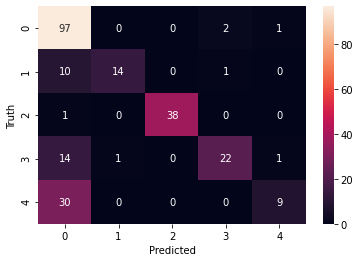

In [12]:
### Scoring ####

print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))


print ("\nAccuracy on Training Set :"+str(accuracy_score( y_train,svm_model_linear.predict(X_train.iloc[:,chromo[-1]]))))
print ("Checking on Test Set")
print ("\nAccuracy on Testing Set :"+str(accuracy_score(y_test,svm_model_linear.predict(X_test.iloc[:,chromo[-1]]))))
  
print ("\nPrecision Score")
print (precision_score(y_test, predictions,average='macro'))
print ("\nRecall Score")
print (recall_score(y_test, predictions,average='macro'))
print ("\nF1 Score")
print (f1_score(y_test, predictions,average='macro'))

#Confusion Matrix
cm = confusion_matrix(y_test, predictions)   
print("Confusion matrix : " )
print(cm)
#plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()